<a href="https://colab.research.google.com/github/ettore9x9/machine_learning_examples/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as nml
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from random import sample

TWO BALLS TOY

In [2]:
n = 100
d = 2
c = 3
Xp = nml.randn(int(n/2),d) + c
Xn = nml.randn(int(n/2),d) - c
X = np.concatenate((Xp,Xn),axis=0)
Xn = nml.randn(int(n/2),d) + 2*c
X = np.concatenate((X,Xn),axis=0)
Yp = np.ones((int(n/2),1))
Yn = -np.ones((int(n/2),1))
Y = np.concatenate((Yp,Yn),axis=0)
Yn = -np.ones((int(n/2),1))
Y = np.concatenate((Y,Yn),axis=0)

NORMALIZATION

In [3]:
scalerX = preprocessing.MinMaxScaler()
X = scalerX.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


MODEL

In [4]:
#M = Ridge(alpha = 1)
M = KernelRidge(alpha = .0001, kernel = 'rbf', gamma = 1000)
M.fit(X,Y)

KernelRidge(alpha=0.0001, gamma=1000, kernel='rbf')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


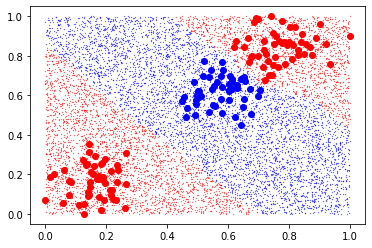

In [5]:
fig, ax = plt.subplots()
ax.plot(X[(Y>0).flatten(),0],X[(Y>0).flatten(),1],'bo')
ax.plot(X[(Y<0).flatten(),0],X[(Y<0).flatten(),1],'ro')

ns = 10000
XS = nml.rand(ns,d)
YS = M.predict(XS)

ax.plot(XS[(YS>0).flatten(),0],XS[(YS>0).flatten(),1],'b.',markersize=.5)
ax.plot(XS[(YS<0).flatten(),0],XS[(YS<0).flatten(),1],'r.',markersize=.5)